# Assignment 4
### Total Points: 50

The goal of this assignment is to make you familiar with classification algorithms.
Complete the following programming tasks in any language of your preference.

### Q1. Data Loading and Cleaning [2+3]

+ Load the Car dataset from this link https://drive.google.com/file/d/1P-ZjzpsZOQc0yp238fHaNYN_gHLTdO_-/view?usp=sharing
+ Clean the 'engine' and 'max_power' columns. They should not contain any non-numeric characters.

In [1]:
import pandas as pd
import re

url = 'https://drive.google.com/uc?id=1P-ZjzpsZOQc0yp238fHaNYN_gHLTdO_-'
data = pd.read_csv(url)

def cleanColumn(column):
    return column.replace(to_replace=r'[^0-9.]', value='', regex=True)


data['engine'] = cleanColumn(data['engine'])
data['max_power'] = cleanColumn(data['max_power'])

data['engine'] = pd.to_numeric(data['engine'], errors='coerce')
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')

data.head()


,Unnamed: 0,make,model,year,owner,transmission,fuel,engine,max_power,seats,km_driven,seller_type,price_category
0,0,Maruti,Swift,2014,First Owner,Manual,Diesel,1248.0,74.00,5.0,145500,Individual,Medium
1,1,Skoda,Rapid,2014,Second Owner,Manual,Diesel,1498.0,103.52,5.0,120000,Individual,Medium
2,2,Honda,City,2006,Third Owner,Manual,Petrol,1497.0,78.00,5.0,140000,Individual,Low
3,3,Hyundai,i20,2010,First Owner,Manual,Diesel,1396.0,90.00,5.0,127000,Individual,Low
4,4,Maruti,Swift,2007,First Owner,Manual,Petrol,1298.0,88.20,5.0,120000,Individual,Low


### Q2. Feature Selection [2]
Consider the `price_category` as the target variable (y) and the remaining columns as explanatory variables (X).

In [ ]:
y = data['price_category']
X = data.drop(columns=['price_category'])

X.head(), y.head()

(   Unnamed: 0     make  model  year         owner transmission    fuel  \
 0           0   Maruti  Swift  2014   First Owner       Manual  Diesel   
 1           1    Skoda  Rapid  2014  Second Owner       Manual  Diesel   
 2           2    Honda   City  2006   Third Owner       Manual  Petrol   
 3           3  Hyundai    i20  2010   First Owner       Manual  Diesel   
 4           4   Maruti  Swift  2007   First Owner       Manual  Petrol   
 
    engine  max_power  seats  km_driven seller_type  
 0  1248.0      74.00    5.0     145500  Individual  
 1  1498.0     103.52    5.0     120000  Individual  
 2  1497.0      78.00    5.0     140000  Individual  
 3  1396.0      90.00    5.0     127000  Individual  
 4  1298.0      88.20    5.0     120000  Individual  ,
 0    Medium
 1    Medium
 2       Low
 3       Low
 4       Low
 Name: price_category, dtype: object)

### Q3. Split the dataset [3]
Randomly split the dataset (X and y) into Train (75%) and Test Set (25%).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6096, 12), (2032, 12), (6096,), (2032,))

### Q4. Build Classification Models [3+3+4+10]


1.   Build a decision tree with the training data. Use GINI as the criteria..
2.   Evaluate the tree's performance with the test data.
3.   Visualize the tree.
4. Repeat 1-3 but use Entropy as the criteria instead of GINI. Is there any difference in performance?

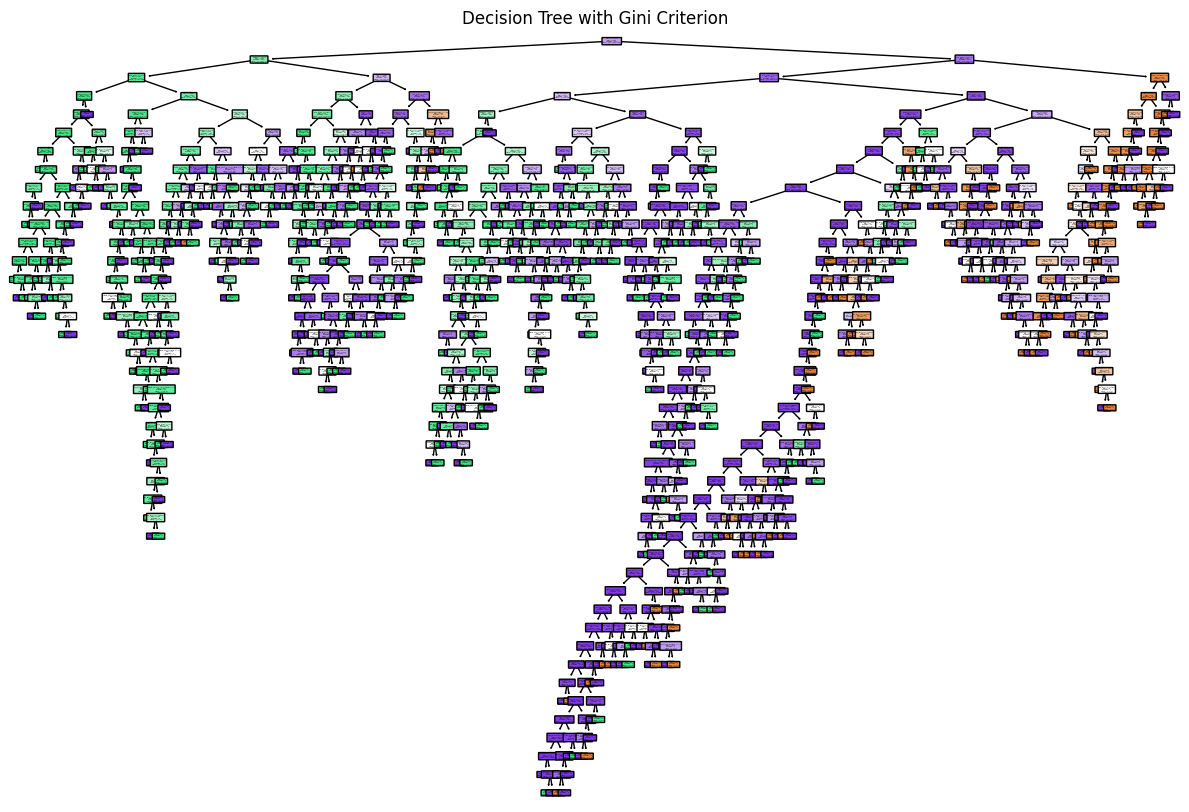

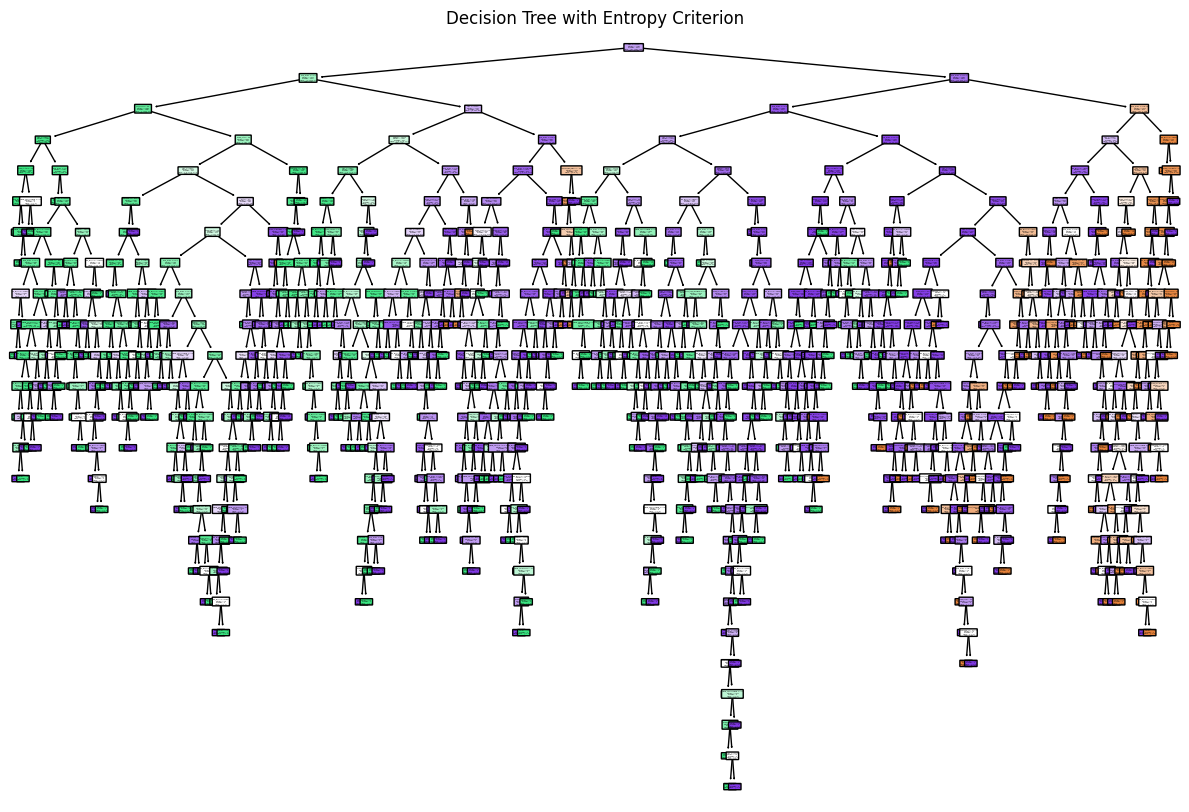

Gini Accuracy: 0.88
Entropy Accuracy: 0.89
The Entropy criterion performed just a little bit better in predicting the target variable


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train, y_train)

y_pred_gini = gini_tree.predict(X_test)
gini_accuracy = accuracy_score(y_test, y_pred_gini)

plt.figure(figsize=(15, 10))
plot_tree(gini_tree, feature_names=X_encoded.columns, class_names=gini_tree.classes_, filled=True, rounded=True)
plt.title("Decision Tree with Gini Criterion")
plt.show()

entropyTree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropyTree.fit(X_train, y_train)

yEntropy = entropyTree.predict(X_test)
entropyAccuracy = accuracy_score(y_test, yEntropy)

plt.figure(figsize=(15, 10))
plot_tree(entropyTree, feature_names=X_encoded.columns, class_names=entropyTree.classes_, filled=True, rounded=True)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

print(f"Gini Accuracy: {gini_accuracy:.2f}")
print(f"Entropy Accuracy: {entropyAccuracy:.2f}")

print("The Entropy criterion performed just a little bit better in predicting the target variable")

Answer the following questions with the best criteria (between GINI and Entropy) that you found in Q4.
### Q5. Optimization [3+3+3+1]
1.   Build a decision tree with the best criteria and max_depth = 3. Evaluate the tree's performance with the test data.
2.   Build a decision tree with the best criteria and max_depth = 5. Evaluate the tree's performance with the test data.
3.   Build a decision tree with the best criteria and max_depth = 7. Evaluate the tree's performance with the test data.
4. What's your observation from the three performances?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depthsToEvaluate = [3, 5, 7]

for depth in depthsToEvaluate:
    entropyTree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    entropyTree.fit(X_train, y_train)
    yPred = entropyTree.predict(X_test)
    accuracy = accuracy_score(y_test, yPred)
    print(f"Entropy Accuracy (max_depth={depth}): {accuracy:.2f}")

print("Observation: Accuracy generally improves with increasing max_depth, though the improvement may become smaller at higher depths.")


Entropy Accuracy (max_depth=3): 0.83
Entropy Accuracy (max_depth=5): 0.87
Entropy Accuracy (max_depth=7): 0.89
Observation: Accuracy generally improves with increasing max_depth, though the improvement may become smaller at higher depths.


### Q6. Random Forest [3+3+3+1]
1. Build a random forest with the best criteria (between GINI and Entropy) that you found in Q4.
2. Evaluate the tree's performance with the test data.
3. Repeat part 1 and 2 but set `n_estimators = 10`. Evaluate the tree's performance with the test data.
4. What's your observation from the performances of decision trees and the random forests?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfDefault = RandomForestClassifier(criterion='entropy', random_state=42)
rfDefault.fit(X_train, y_train)
yPredDefault = rfDefault.predict(X_test)
accDefault = accuracy_score(y_test, yPredDefault)
print(f"Random Forest Accuracy (default n_estimators): {accDefault:.2f}")

rf10 = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)
rf10.fit(X_train, y_train)
yPred10 = rf10.predict(X_test)
acc10 = accuracy_score(y_test, yPred10)
print(f"Random Forest Accuracy (n_estimators=10): {acc10:.2f}")

print("Increasing number of trees doesn't improve anything as they both have an accuracy of .91")


Random Forest Accuracy (default n_estimators): 0.91
Random Forest Accuracy (n_estimators=10): 0.91
Observation: Random Forest accuracy may increase with more estimators, but improvements can diminish as the ensemble grows.
